In [57]:
import csv
import matplotlib.pyplot as plt
import numpy as np
TESTS = 3
ANGLES = [15, 45, 135]

In [58]:
def read_csv_to_arrays(filename):
    time_diff = []
    position = []
    angle = []

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            time_diff.append(float(row['time_diff']))
            position.append(float(row['position']))
            angle.append(float(row['angle']))

    return time_diff, position, angle

In [59]:
def calculate_angular_velocity(angle, time_diff):
    angular_velocity = []
    for i in range(1, len(angle)):
        delta_angle = angle[i] - angle[i - 1]
        delta_time = time_diff[i]
        angular_velocity.append(delta_angle / delta_time)
    return angular_velocity

def calculate_velocity(position, time_diff):
    velocity = []
    for i in range(1, len(position)):
        delta_position = position[i] - position[i - 1]
        delta_time = time_diff[i]
        velocity.append(delta_position / delta_time)
    return velocity


In [76]:
# Function to plot data
def plot_data(time, position, angle, velocity, angular_velocity, leg):
    

    time = time.reshape(-1)
    position = position.reshape(-1)
    angle = angle.reshape(-1)
    velocity = velocity.reshape(-1)
    angular_velocity = angular_velocity.reshape(-1)
    
    plt.subplots(figsize=(20, 15))
    
    # Plot position
    plt.subplot(2, 2, 1)
    plt.xlabel('Time Difference')
    plt.ylabel('Position')
    plt.title('Position vs Time')
    plt.plot(time, position, label=leg)
    plt.legend()

    # Plot Angle
    plt.subplot(2, 2, 2)
    plt.xlabel('Time Difference')
    plt.ylabel('Angle')
    plt.title('Angle vs Time')
    plt.plot(time, angle, label=leg)
    plt.legend()


    # Plot Velocity of Position
    plt.subplot(2, 2, 3)
    plt.xlabel('Time Difference')
    plt.ylabel('Velocity')
    plt.title('Velocity of Position vs Time')
    plt.plot(time[:-1], velocity, label=leg)
    plt.legend()

    # Plot Angular Velocity
    plt.subplot(2, 2, 4)
    plt.xlabel('Time Difference')
    plt.ylabel('Angular Velocity')
    plt.title('Angular Velocity vs Time')
    plt.plot(time[:-1], angular_velocity, label=leg)
    plt.legend()

    plt.show()


In [61]:
def avegare(array):
    # Calculate average along the first axis
    average_array = np.mean(array, axis=0)

    # Reshape the result to have shape (1, 196)
    average_array = average_array.reshape(1, -1)

    return average_array


Position Array Shape: (3, 196)
Angle Array Shape: (3, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (3, 196)


/tmp/ipykernel_50320/3659210441.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


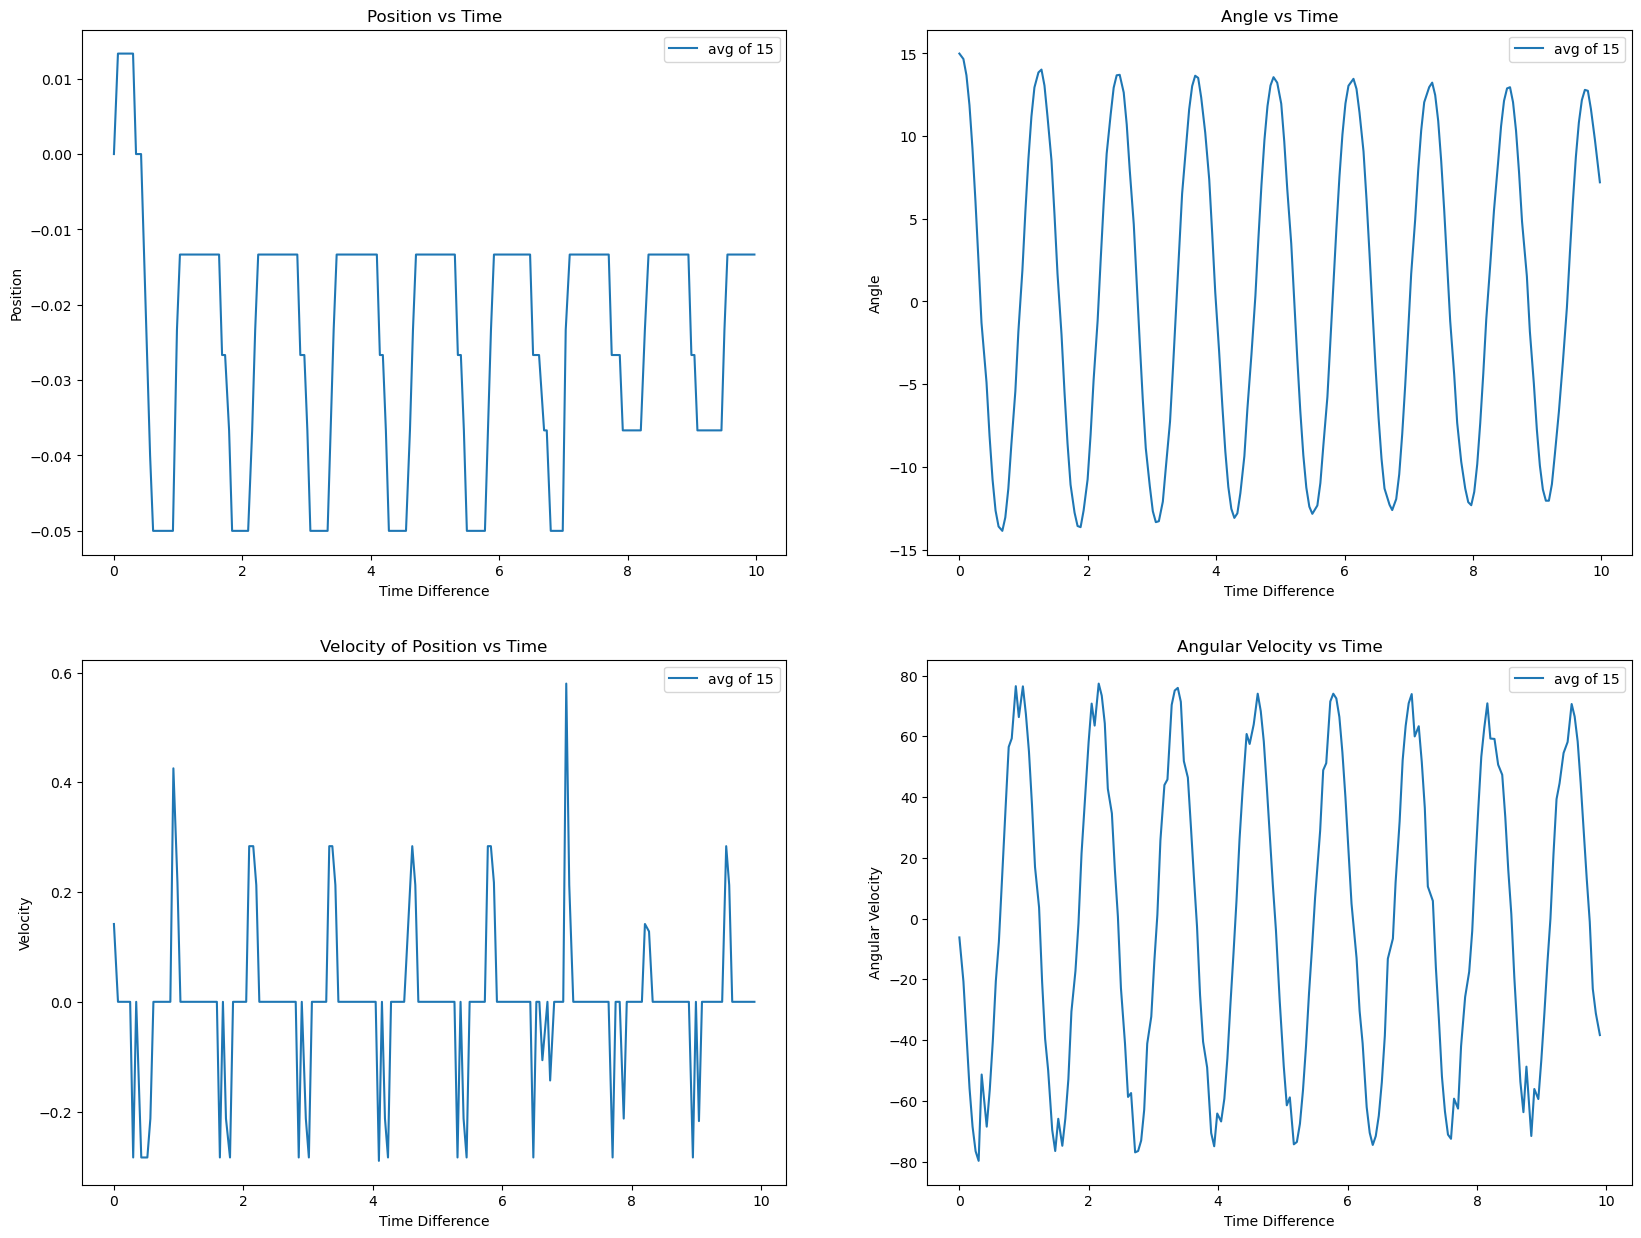

Position Array Shape: (3, 196)
Angle Array Shape: (3, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (3, 196)


/tmp/ipykernel_50320/329227665.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  angular_velocity.append(delta_angle / delta_time)
/tmp/ipykernel_50320/329227665.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  velocity.append(delta_position / delta_time)


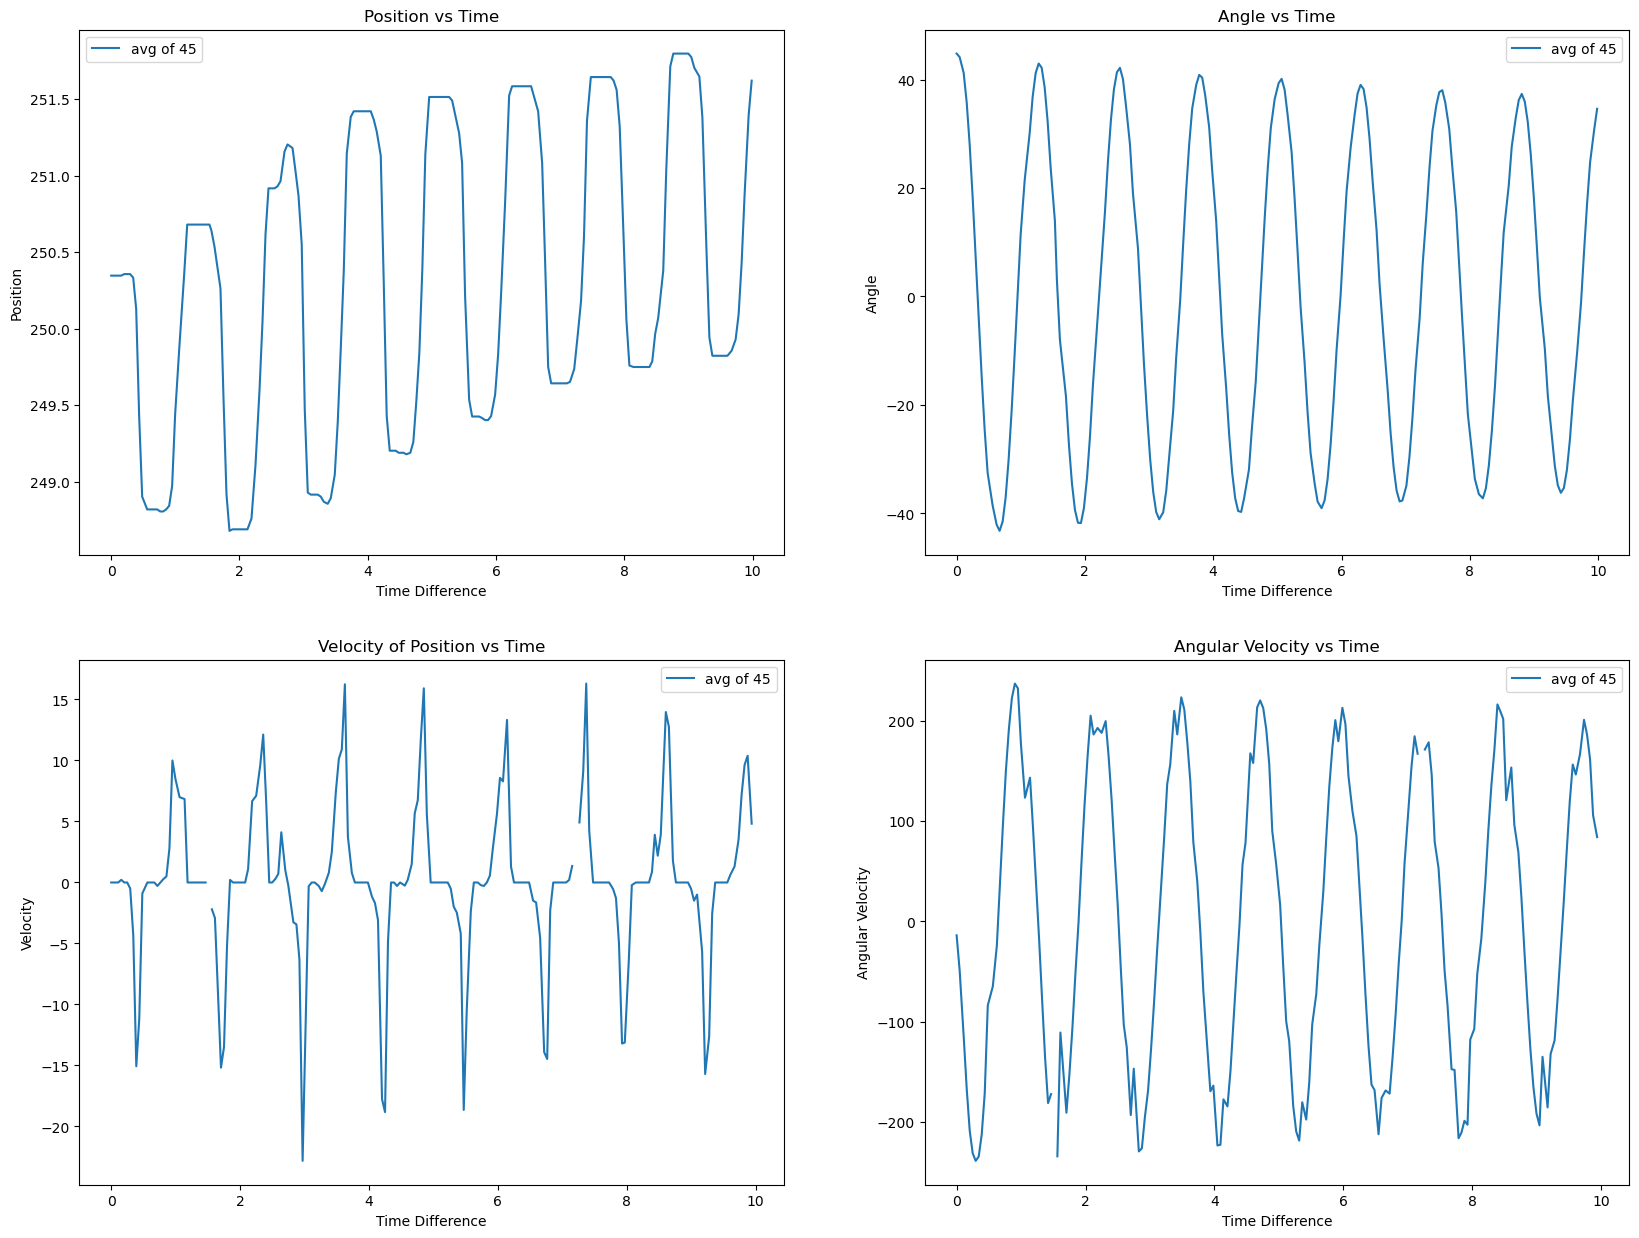

Position Array Shape: (3, 196)
Angle Array Shape: (3, 196)
Time Difference Array Shape: (3, 196)
Time Array Shape: (3, 196)


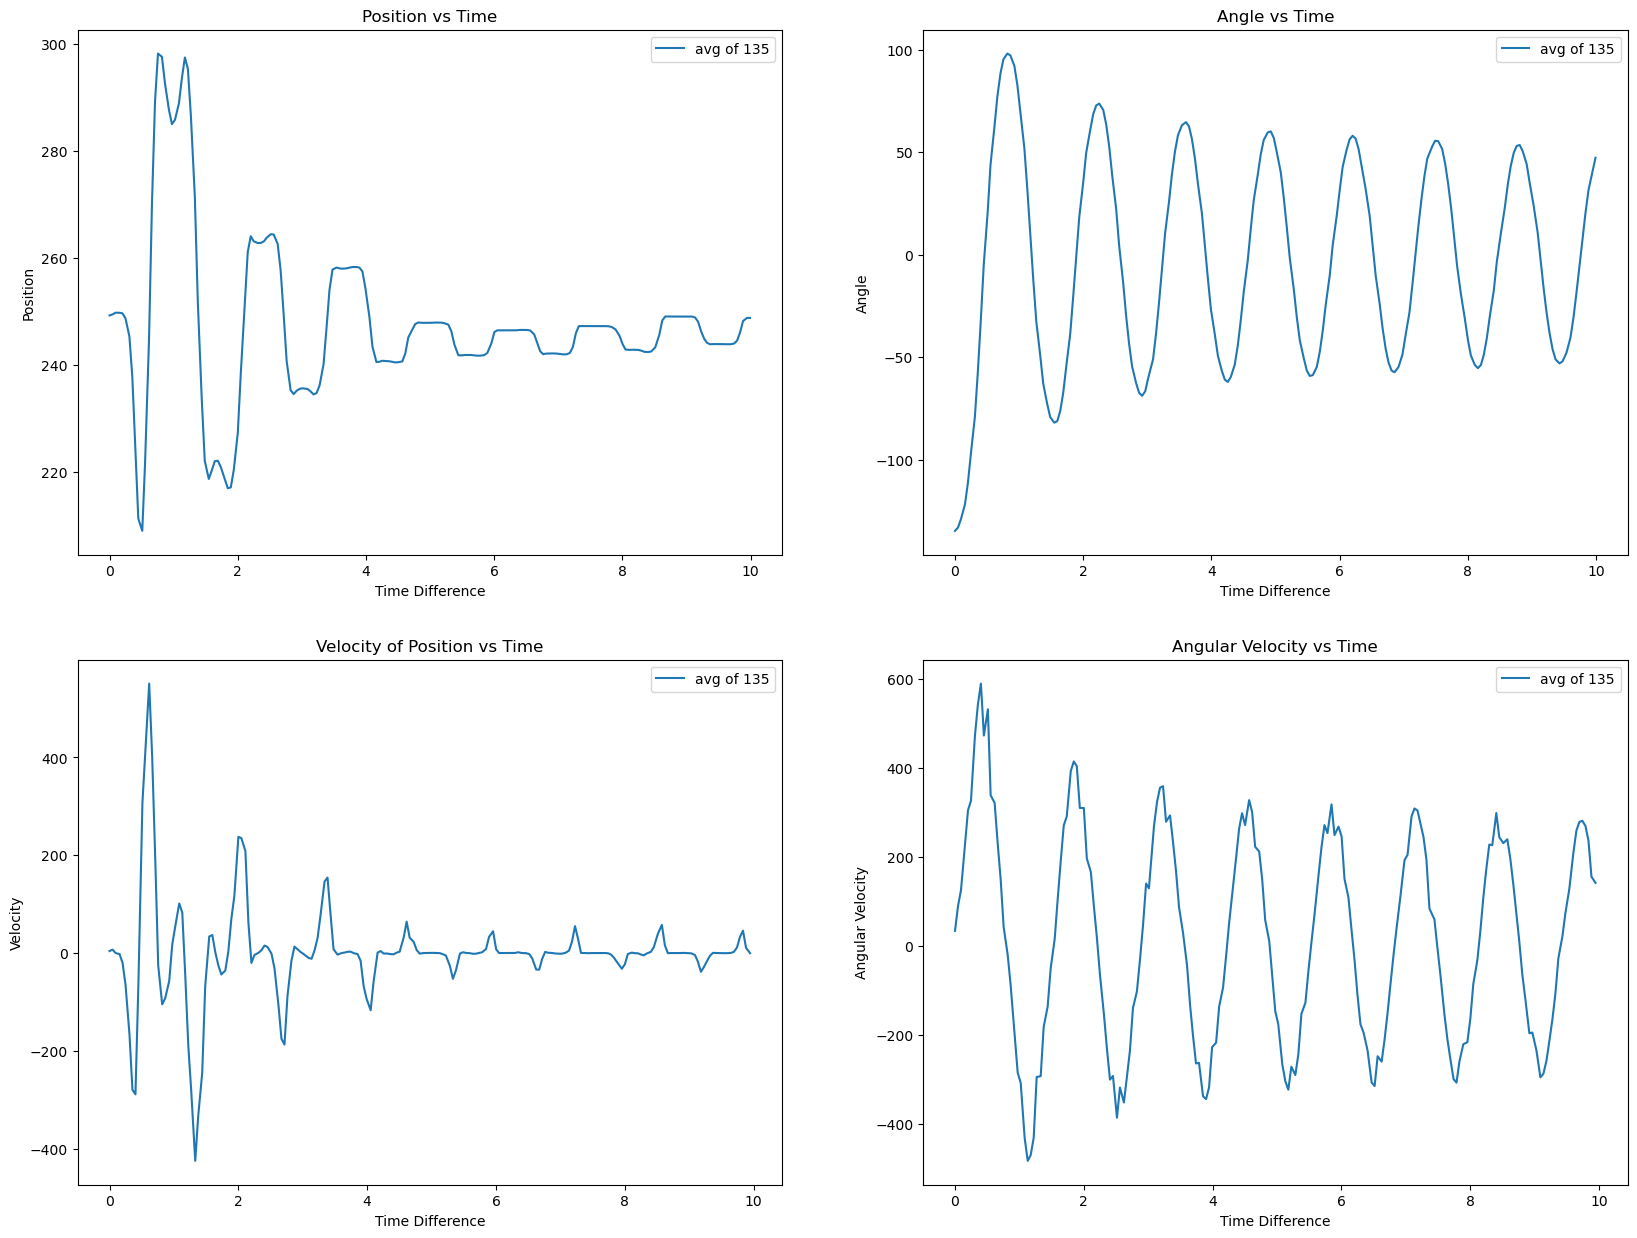

In [77]:

for ang in ANGLES:

    # Initialize empty arrays to store data
    position = []
    angle = []
    time_diff = []
    time = []
    
    # Iterate over the CSV files
    for j in range(TESTS):

        file_name = f'./clean/test{j+1}_{ang}.csv'

        # Read data from CSV file
        t, p, a = read_csv_to_arrays(file_name)
        
        # Append data to respective lists
        time_diff.append(t)
        position.append(p)
        angle.append(a)

        temp_time = [0]
        for i in range(1, len(t)):
            temp_time.append(temp_time[i-1] + t[i])
        time.append(temp_time)

    # Convert lists to numpy arrays
    time_diff = np.array(time_diff)
    position = np.array(position)
    angle = np.array(angle)
    time = np.array(time)

    print("Position Array Shape:", position.shape)
    print("Angle Array Shape:", angle.shape)
    print("Time Difference Array Shape:", time_diff.shape)
    print("Time Array Shape:", time.shape)


    angular_velocity = []
    velocity = []

    for j in range(TESTS):
        angular_velocity.append(calculate_angular_velocity(angle[j], time_diff[j]))
        velocity.append(calculate_velocity(position[j], time_diff[j]))

    angular_velocity = np.array(angular_velocity)
    velocity = np.array(velocity)

    avg_time = avegare(time)
    avg_position = avegare(position) 
    avg_angle = avegare(angle) 
    avg_velocity = avegare(velocity) 
    avg_angular_velocity = avegare(angular_velocity) 


    
    
    
    plot_data(avg_time, avg_position, avg_angle, avg_velocity, avg_angular_velocity, leg=f'avg of {ang}')
